In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install Tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [8]:
dataframe=pd.read_csv("/creditcard.csv")

In [9]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
dataframe.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
dataframe.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
dataframe['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
non_default = dataframe[dataframe.Class == 0]
default = dataframe[dataframe.Class == 1]
print(non_default.shape)
print(default.shape)

(284315, 31)
(492, 31)


In [15]:
dataframe.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
non_default_sample = non_default.sample(n=492)

In [17]:
updated_dataframe = pd.concat([non_default_sample, default], axis=0)

In [18]:
updated_dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29619,35552.0,-1.157265,-0.399137,0.831705,1.496427,-0.829262,1.032040,2.015676,0.037130,-0.431519,...,0.206630,-0.025299,0.767132,-0.497995,0.329988,-0.169624,-0.015019,0.136485,449.00,0
173064,121347.0,-0.542615,-1.138015,-3.160786,-0.185688,-4.394256,3.154825,6.710087,-1.510140,-2.526369,...,0.488443,1.871167,0.465990,0.242498,0.208226,0.623293,0.411023,-0.392755,1367.30,0
76437,56569.0,-0.467958,0.389235,0.458680,-2.173947,0.040808,-1.041474,1.195709,-0.266412,0.169296,...,-0.237547,-0.674008,0.085752,0.005914,0.096774,-0.332324,-0.089310,-0.037425,75.00,0
93457,64428.0,-2.728952,-3.103041,2.200832,1.002404,2.812762,-1.745798,-1.608264,0.092993,0.987192,...,0.324029,0.729087,0.304399,-0.035045,-0.528884,-0.582084,-0.541161,0.385130,1.00,0
96344,65732.0,-0.791644,0.254513,1.825866,1.243562,0.404067,0.282735,0.212899,0.298448,-0.573935,...,-0.020224,-0.099508,-0.041325,0.020561,0.408418,-0.261293,0.012647,-0.009095,51.99,0


In [19]:
updated_dataframe.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
updated_dataframe['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
updated_dataframe.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94912.105691,0.097671,0.036639,0.019749,0.058980,0.026047,0.059391,0.031678,-0.066481,0.086874,...,0.028395,0.023369,-0.023388,0.002739,-0.046369,0.009398,0.030311,-0.011420,-0.002955,90.462175
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
X = updated_dataframe.drop(columns='Class', axis=1)
Y = updated_dataframe['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
29619    35552.0 -1.157265 -0.399137  0.831705  1.496427 -0.829262  1.032040   
173064  121347.0 -0.542615 -1.138015 -3.160786 -0.185688 -4.394256  3.154825   
76437    56569.0 -0.467958  0.389235  0.458680 -2.173947  0.040808 -1.041474   
93457    64428.0 -2.728952 -3.103041  2.200832  1.002404  2.812762 -1.745798   
96344    65732.0 -0.791644  0.254513  1.825866  1.243562  0.404067  0.282735   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [23]:
print(Y)

29619     0
173064    0
76437     0
93457     0
96344     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [26]:
print(Y.shape, Y_train.shape, Y_test.shape)

(984,) (787,) (197,)


In [27]:
m1 = LogisticRegression()

In [28]:
m1.fit(X_train, Y_train)

LogisticRegression()

In [29]:
training_of_x_prediction = m1.predict(X_train)
accuracy_on_training_data = accuracy_score(training_of_x_prediction, Y_train)

In [30]:
print("the accuracy on the trainset is : ")
print(accuracy_on_training_data)

the accuracy on the trainset is : 
0.9428208386277002


In [31]:
testing_of_x_prediction = m1.predict(X_test)
accuracy_on_testing_data = accuracy_score(testing_of_x_prediction, Y_test)

In [32]:
print("the accuracy on the testset is : ")
print(accuracy_on_testing_data)

the accuracy on the testset is : 
0.9238578680203046


In [33]:
#normalization
scalar = StandardScaler()
x=X
X=scalar.fit_transform(x)
X

array([[-1.09463459,  0.21440378, -0.61167094, ..., -0.09478914,
         0.23857877,  1.4352119 ],
       [ 0.70182188,  0.32609652, -0.81439867, ...,  0.33212079,
        -1.02245324,  5.28142265],
       [-0.65456086,  0.33966293, -0.39536343, ..., -0.16923199,
        -0.17579961, -0.13125094],
       ...,
       [ 1.70697482,  0.3018322 , -0.19311504, ...,  0.30615274,
         0.37648315, -0.11914645],
       [ 1.71985227, -0.14113874, -0.34141386, ...,  0.80693938,
        -0.69112459,  0.58077762],
       [ 1.72785095,  0.78667629, -0.45867743, ..., -0.0767459 ,
        -0.12310335, -0.26724839]])

In [34]:
#spliting the training and test & validation set
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

#now spliting the test and validation set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(688, 30) (148, 30) (148, 30) (688,) (148,) (148,)


In [35]:
m2 = Sequential([
    Dense(64, activation='relu', input_shape=(30,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [36]:
m2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
history = m2.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
11/11 [==============================] - 1s 53ms/step - loss: 0.7125 - accuracy: 0.4549 - val_loss: 0.6925 - val_accuracy: 0.4527
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: 0.6574 - accuracy: 0.5349 - val_loss: 0.6414 - val_accuracy: 0.5203
Epoch 3/20
11/11 [==============================] - 0s 6ms/step - loss: 0.6155 - accuracy: 0.5974 - val_loss: 0.6018 - val_accuracy: 0.6351
Epoch 4/20
11/11 [==============================] - 0s 10ms/step - loss: 0.5821 - accuracy: 0.6933 - val_loss: 0.5690 - val_accuracy: 0.7365
Epoch 5/20
11/11 [==============================] - 0s 14ms/step - loss: 0.5545 - accuracy: 0.7703 - val_loss: 0.5413 - val_accuracy: 0.8108
Epoch 6/20
11/11 [==============================] - 0s 9ms/step - loss: 0.5310 - accuracy: 0.8314 - val_loss: 0.5172 - val_accuracy: 0.8311
Epoch 7/20
11/11 [==============================] - 0s 18ms/step - loss: 0.5106 - accuracy: 0.8619 - val_loss: 0.4957 - val_accuracy: 0.8514
Epoch 8/20
11/11

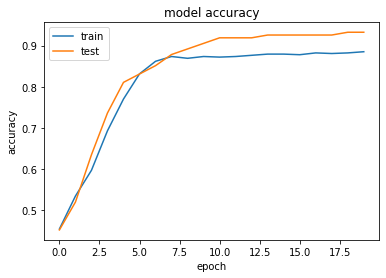

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

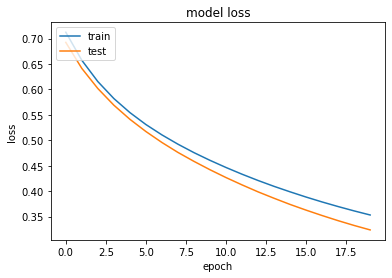

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
m2.evaluate(X_test, Y_test)[1]

5/5 [==============================] - 0s 8ms/step - loss: 0.3240 - accuracy: 0.9392


0.9391891956329346